# Data Understanding & Cleaning

#### Setup and Initial Data Exploration

In [24]:
import pandas as pd
import numpy as np

df = pd.read_csv('sales simulation.csv')
print(df.head()) #1st five row to understand the data

      user_id  age sex  phone_number joined_date      country payment_method  \
0  ****980545   22   M  63**409216**  2023-02-14  Philippines           maya   
1  ****906406   23   M  63**369756**  2024-04-19  Philippines         visa_c   
2  ****860958   19   F  63**558004**  2023-03-03  Philippines          gcash   
3  ****845150   58   O  63**783910**  2024-04-18  Philippines            otc   
4  ****664897   37   O  63**600892**  2021-09-29  Philippines         visa_d   

   loyalty_program_member  loyalty_points_redeemed  loyalty_tier  ...  \
0                       1                        1           2.0  ...   
1                       0                        0           NaN  ...   
2                       0                        0           NaN  ...   
3                       0                        0           NaN  ...   
4                       0                        0           NaN  ...   

   return_date   order_id  released_date  estimated_delivery_date  \
0          

In [54]:
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382423 entries, 0 to 382422
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   user_id                        382423 non-null  object 
 1   age                            382423 non-null  int64  
 2   sex                            382423 non-null  object 
 3   phone_number                   382423 non-null  object 
 4   joined_date                    382423 non-null  object 
 5   country                        382423 non-null  object 
 6   payment_method                 382423 non-null  object 
 7   loyalty_program_member         382423 non-null  int64  
 8   loyalty_points_redeemed        382423 non-null  int64  
 9   loyalty_tier                   382423 non-null  float64
 10  tier_discount_percentage       382423 non-null  float64
 11  card_discount_percentage       382423 non-null  float64
 12  coupon_d

##### The .info() method is our first go-to. It's like a quick health check of our data, telling us about column names, the number of non-null values, and their data types. This immediately helps us spot potential missing values and incorrect data types.

In [57]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.") #dataset shape

The dataset has 382423 rows and 37 columns.


#### Data Cleaning

In [60]:
# Missing value
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0]) #wherever missing value is greater then 0

Missing values in each column:
Series([], dtype: int64)


In [62]:
# Fill missing values with 0
df['loyalty_tier'] = df['loyalty_tier'].fillna(0)
df['tier_discount_percentage'] = df['tier_discount_percentage'].fillna(0)
df['card_discount_percentage'] = df['card_discount_percentage'].fillna(0)
df['return_date'] = df['return_date'].fillna(0)

# check if all missing values are filled with 0
print("Missing values after cleaning:")
print(df.isnull().sum().any()) # return False if all are done

Missing values after cleaning:
False


In [64]:
# Checking for Duplicate Records
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [70]:
# Correcting Data Types

# date and time columns to datetime objects  for time-series analysis
date_cols = ['joined_date', 'payment_date', 'payment_time', 'purchased_date', 'purchased_time', 'return_date', 'released_date',
             'estimated_delivery_date', 'received_date']

df[date_cols] = df[date_cols].apply(pd.to_datetime, errors='coerce',format='%Y-%m-%d') #if any error will come then throw NaT instead of crashing.

# flag/boolean column
df['loyalty_program_member'] = df['loyalty_program_member'].astype(bool)

# money columns to float
money_cols = ['total_purchase', 'refund_amount', 'shipping_cost']
df[money_cols] = df[money_cols].astype(float)

# discount percentage columns to float
df['total_discount_percentage'] = df['total_discount_percentage'].astype(float)

# categorical columns for efficiency
cat_cols = ['sex', 'country', 'payment_method','product_category', 'purchase_medium','return_status', 'shipping_method']
df[cat_cols] = df[cat_cols].astype('category')

# Rechecking
print("Data types of date columns after conversion <rechecking>:")
print(df[['joined_date', 'payment_date', 'purchased_date']].dtypes)

Data types of date columns after conversion <rechecking>:
joined_date       datetime64[ns]
payment_date      datetime64[ns]
purchased_date    datetime64[ns]
dtype: object


In [72]:
print(df['joined_date'].head(10))

0   2023-02-14
1   2024-04-19
2   2023-03-03
3   2024-04-18
4   2021-09-29
5   2022-11-24
6   2023-04-25
7   2022-11-20
8   2024-05-19
9   2024-02-15
Name: joined_date, dtype: datetime64[ns]


##### Treating dates as strings (object) is a common mistake. Converting them to a datetime type unlocks powerful capabilities, like extracting the month, year, or day of the week, which is crucial for trend analysis.

In [75]:
# check if the data makes logical sense, Outlier Detection
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
                 age                    joined_date  loyalty_points_redeemed  \
count  382423.000000                         382423            382423.000000   
mean       38.972808  2022-06-30 12:54:13.021915392                 2.259464   
min        18.000000            2020-01-01 00:00:00                 0.000000   
25%        28.000000            2021-03-31 00:00:00                 0.000000   
50%        39.000000            2022-06-30 00:00:00                 0.000000   
75%        50.000000            2023-09-30 00:00:00                 5.000000   
max        60.000000            2024-12-30 00:00:00                 9.000000   
std        12.390457                            NaN                 3.031826   

        loyalty_tier  tier_discount_percentage  card_discount_percentage  \
count  382423.000000             382423.000000             382423.000000   
mean        1.250317                  3.125811                  0.693481   
min         0.000000       

##### Age: The age range seems reasonable (18 to 60).

##### total_purchase: The values are all positive, which is good. The max value is quite high, which could indicate some high-value customers or a potential outlier. We'll investigate this during EDA.

##### Discounts: The total_discount_percentage ranges from 0 to 20, which seems like a plausible business rule.

##### Delivery Days: there are negative delivery days, which would be an error. We'll check it now...

In [85]:
negative_delivery_days = df[df['total_delivery_days'] < 0].shape[0]
print(f"Number of orders with negative delivery days: {negative_delivery_days}")

Number of orders with negative delivery days: 1298


In [87]:
# Fixing negative delivery days with 0
df.loc[df['total_delivery_days'] < 0, 'total_delivery_days'] = 0

# Recheck the numbers of orders with negative delivery days
print((df['total_delivery_days'] < 0).sum())  # should print 0 now

0


# EDA

In [91]:
# Import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

#### Q1: What is the demographic profile of our customers? (Age & Gender)

##### Understanding who our customers are is the first step to serving them better.

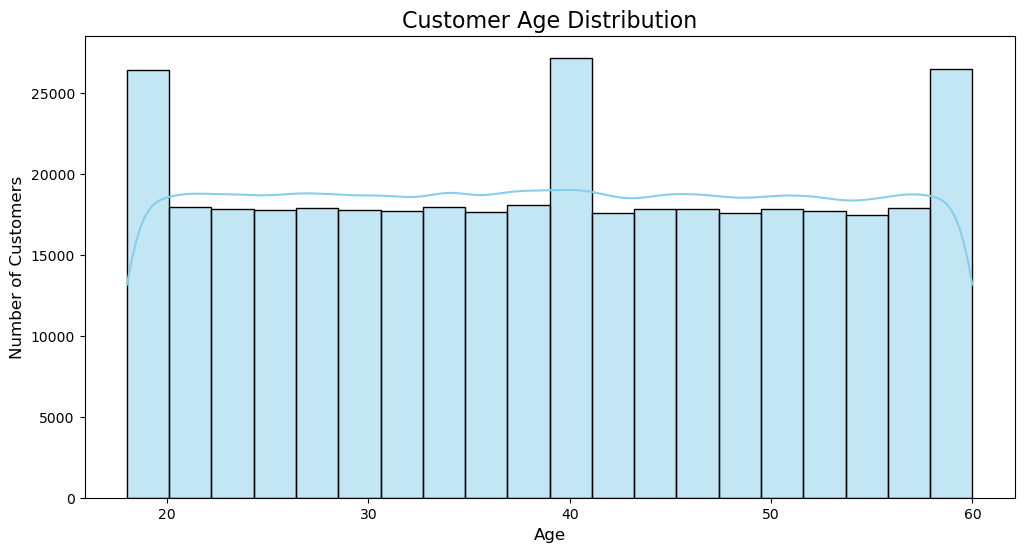

In [122]:
# Age Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Customer Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.savefig('age_distribution.png') # Saves the plot as an image
plt.show()

#### Insights & Business Strategy:

The customer base is spread fairly evenly between ages 20 and 60, which means the business attracts a wide range of age groups.
However, there are clear spikes among younger customers (around 18–20 years old) and older customers (around 40 and 60 years old).
This suggests that while the overall distribution is balanced, specific age groups are slightly overrepresented at the entry (young) and exit (older) ends.

##### Business Strategy:

Targeted Marketing:
For younger customers (18–20) - focus on trendy, affordable products and student discounts.
For older customers (40–60) - highlight quality, reliability, and premium services.
Balanced Engagement: Since the middle age groups (25–50) are steady, maintain consistent offers to keep them engaged.
Product Segmentation: Design products or campaigns tailored to both youth-driven demand and mature customer needs.

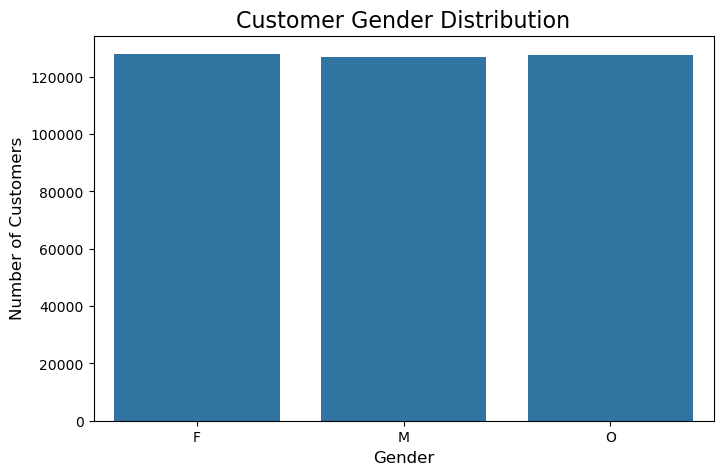

In [124]:
# Gender Distribution
plt.figure(figsize=(8, 5))
gender_counts = df['sex'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Customer Gender Distribution', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.show()

##### Gender: We have a balanced mix of male and female customers.

#### Insights & Business Strategy:

The gender distribution is almost perfectly balanced, with no single gender dominating the customer base.
This shows that the business appeals equally to male, female, and other gender identities, which is a strong indicator of inclusivity.

##### Actionable Strategy:

Inclusive Marketing: Design campaigns that represent and speak to all genders equally. Avoid overly gender-stereotyped messaging.
Product Personalization: Offer product categories that appeal to different gender segments, but keep the overall brand identity neutral and welcoming.
Brand Image: Highlight inclusivity in campaigns ... this can improve brand loyalty, especially among younger, socially conscious customers.

#### Q2: How are our sales performing over time?

##### Are there seasonal patterns we can leverage?

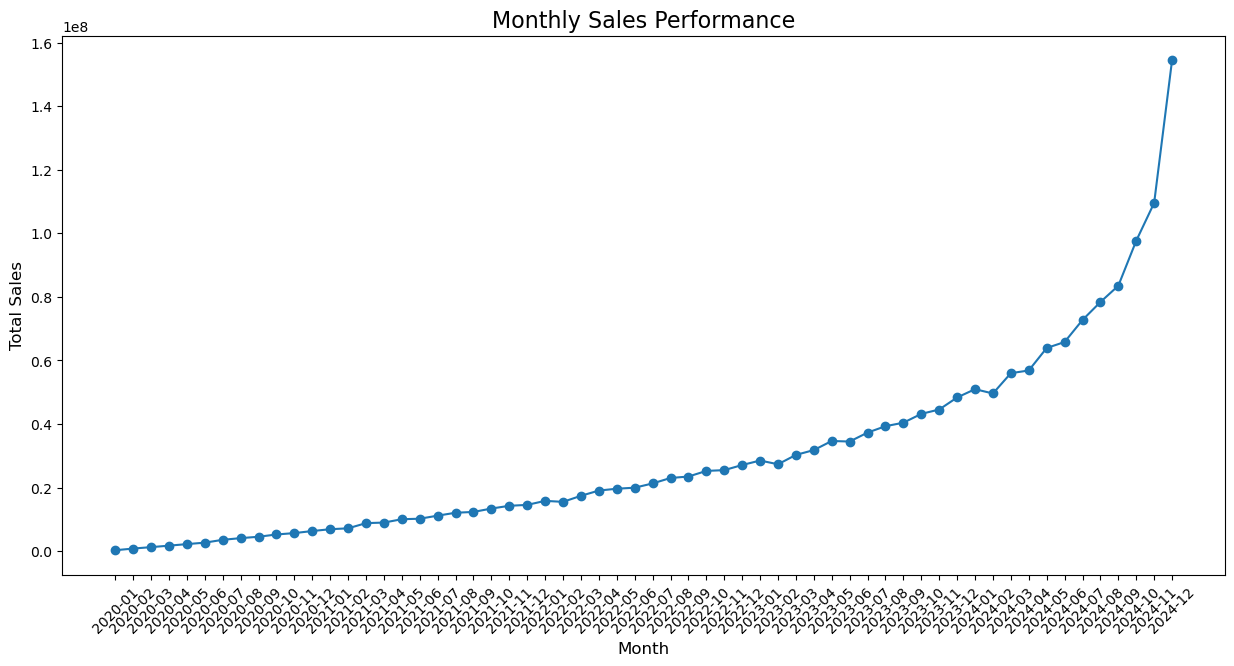

In [175]:
# purchase date into Year-Month format
df['YearMonth'] = df['purchased_date'].dt.strftime('%Y-%m')

# total sales for each month
monthly_sales = df.groupby('YearMonth', as_index=False)['total_purchase_after_discount'].sum()

# Plot
plt.figure(figsize=(15, 7))
plt.plot(monthly_sales['YearMonth'], monthly_sales['total_purchase_after_discount'], marker='o')
plt.title('Monthly Sales Performance', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.show()

#### Insights & Business Strategy:

#####  Trend: 
Sales are growing exponentially, especially accelerating from 2022 onward.

##### Business Strategy:

Focus on scaling supply chain, inventory, and workforce capacity to keep up with growth.
Invest in forecasting models, since exponential growth may strain operations if demand outpaces supply.Consider strategic investments (automation, partnerships, expansion) to sustain momentum.
Monitor whether this growth is sustainable or driven by temporary external factors (e.g., market boom, promotions).

#### Q3: Which are our top-performing product categories?

##### Knowing which products sell best helps in inventory planning, marketing, and strategic decision-making.

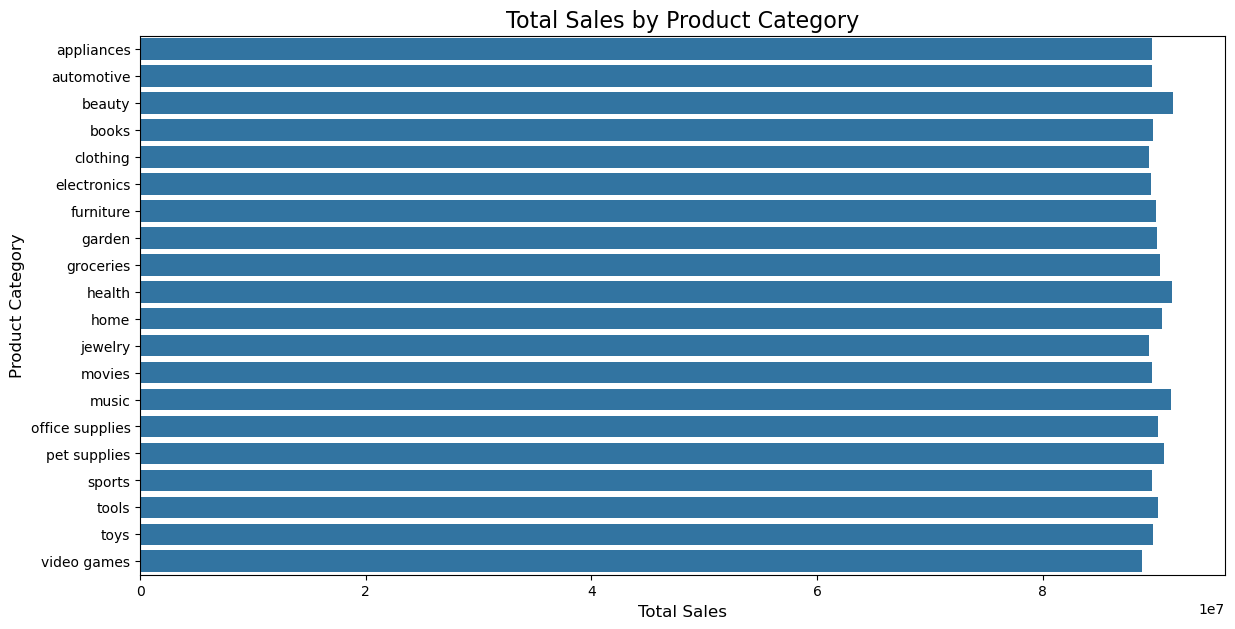

In [138]:
# sales by product category
category_sales = df.groupby('product_category', observed=True)['total_purchase_after_discount'].sum().sort_values(ascending=False)

#observed=True (show only categories that actually exist).

# Plot
plt.figure(figsize=(14, 7))
sns.barplot(x=category_sales.values, y=category_sales.index)
plt.title('Total Sales by Product Category', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.show()

#### Insights & Business Strategy:
Trend: Sales are evenly spread across categories, with only minor variation.

Top Categories: Beauty, Groceries, and Office Supplies lead slightly.

Lagging Categories: Video Games and Jewelry are at the lower end, but not dramatically.

##### Business Strategy:

Since sales are evenly distributed, this indicates a well-diversified portfolio ... no single category dominates or lags severely.
Focus should be on maintaining balance and preventing stockouts across all categories.

For marginally lower categories (Video Games, Jewelry), consider market research before promotions ... customer demand may naturally be lower rather than due to pricing/marketing issues.

Cross-category promotions could be effective, since no single product line is overwhelmingly strong.

#### Q4: Which channels are driving the most sales (Online vs. In-store)?

##### This helps us allocate our marketing budget and resources effectively.

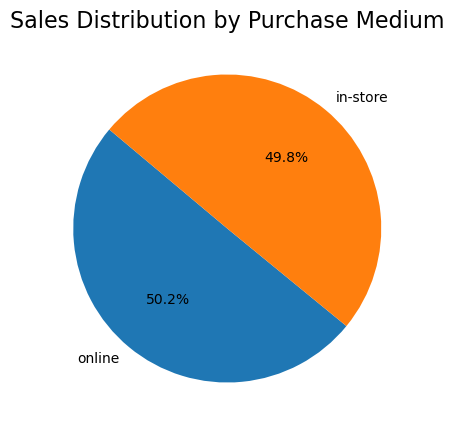

In [147]:
# sales by purchase medium
medium_sales = df.groupby('purchase_medium', observed= False )['total_purchase_after_discount'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
plt.pie(medium_sales, labels=medium_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Purchase Medium', fontsize=16)
plt.ylabel('') # Hides the 'total_purchase_after_discount' label on the y-axis
plt.show()

#### Insights & Business Strategy:

##### Channel Performance: 
Sales distribution is evenly balanced between online and in-store, suggesting customers use both channels almost equally.

##### Business Strategy:

Since both channels perform nearly the same, it’s crucial to maintain an omnichannel strategy ...  ensuring a seamless experience whether customers shop online or in-store.

Invest in digital enhancements (website, app, personalization) while also strengthening physical retail (better service, exclusive promotions, click-and-collect options).

Leverage cross-channel opportunities (e.g., online promotions that drive in-store traffic or in-store events that encourage digital engagement).

#### Q5: What is the impact of the loyalty program on customer spending?

##### A key business question is whether our loyalty program is actually encouraging customers to spend more.

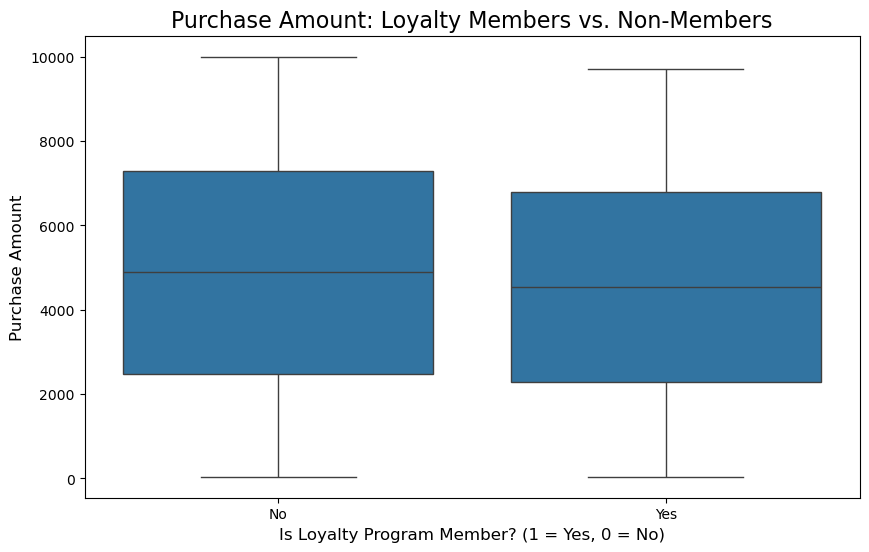

Average Purchase Value:
   loyalty_program_member  total_purchase_after_discount
0                   False                    4876.607401
1                    True                    4548.777482


In [151]:
# impact of the loyalty program
plt.figure(figsize=(10, 6))
sns.boxplot(x='loyalty_program_member', y='total_purchase_after_discount', data=df)
plt.title('Purchase Amount: Loyalty Members vs. Non-Members', fontsize=16)
plt.xlabel('Is Loyalty Program Member? (1 = Yes, 0 = No)', fontsize=12)
plt.ylabel('Purchase Amount', fontsize=12)
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


# Calculate the average purchase value for both groups
avg_purchase_loyalty = df.groupby('loyalty_program_member')['total_purchase_after_discount'].mean().reset_index()
print("Average Purchase Value:")
print(avg_purchase_loyalty)

#### Insights & Business Strategy:

The analysis shows that loyalty program members do not spend more than non-members. In fact, the average and median purchase amounts are slightly lower for members.

This suggests that the loyalty program is not currently driving higher spending behavior. Customers may be joining but not increasing their purchase value.

##### Actionable Strategy:

Program Redesign = Reassess the loyalty benefits. Ensure members clearly see value (e.g., cashback, exclusive discounts, early access).

Engagement Campaigns = Encourage members to shop more frequently (special offers, bonus points for higher spends).

Tiered Benefits = Motivate customers to move up tiers by rewarding larger purchases.

Data-Driven Analysis = Segment members by activity (frequent vs occasional shoppers) and target them with tailored incentives.

#### Q6: How effective are our discount strategies?

##### Are discounts driving higher sales, or are they just eating into our margins? A correlation analysis can provide clues.

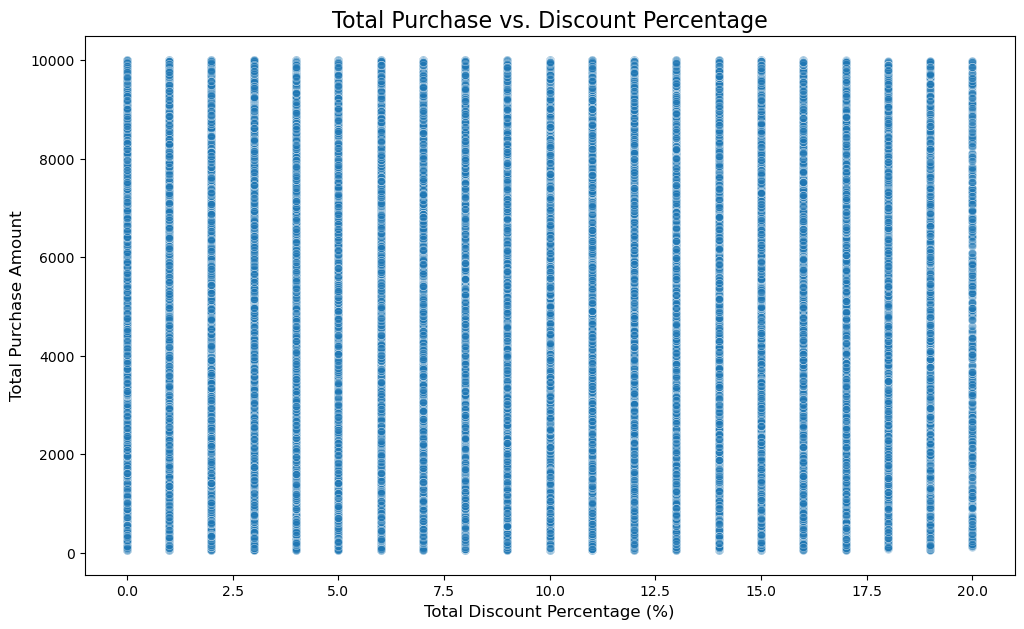

Correlation between Discount Percentage and Total Purchase:
                           total_discount_percentage  total_purchase
total_discount_percentage                    1.00000        -0.00151
total_purchase                              -0.00151         1.00000


In [157]:
# relationship between discounts and purchase amount
plt.figure(figsize=(12, 7))
sns.scatterplot(x='total_discount_percentage', y='total_purchase', data=df, alpha=0.5)
plt.title('Total Purchase vs. Discount Percentage', fontsize=16)
plt.xlabel('Total Discount Percentage (%)', fontsize=12)
plt.ylabel('Total Purchase Amount', fontsize=12)
plt.show()

# Calculate the correlation
correlation = df[['total_discount_percentage', 'total_purchase']].corr()
print("Correlation between Discount Percentage and Total Purchase:")
print(correlation)

#### Insights & Business Strategy:

The correlation between discount percentage and total purchase amount is nearly zero (-0.0015). This shows that discounts do not significantly influence purchase amounts in this dataset.

Customers are likely buying based on product need, brand, or other factors, not discounts.

##### Actionable Strategy:

Instead of relying on flat discounts, businesses should focus on:

Personalized Offers = Based on customer purchase history.

Bundle Deals = Encourage higher cart value.

Loyalty Programs = Reward repeat purchases instead of random discounts.

#### Q7: How does delivery time affect customer satisfaction?

##### In e-commerce, a fast and reliable delivery can make or break the customer experience. Let's see if our data reflects this.

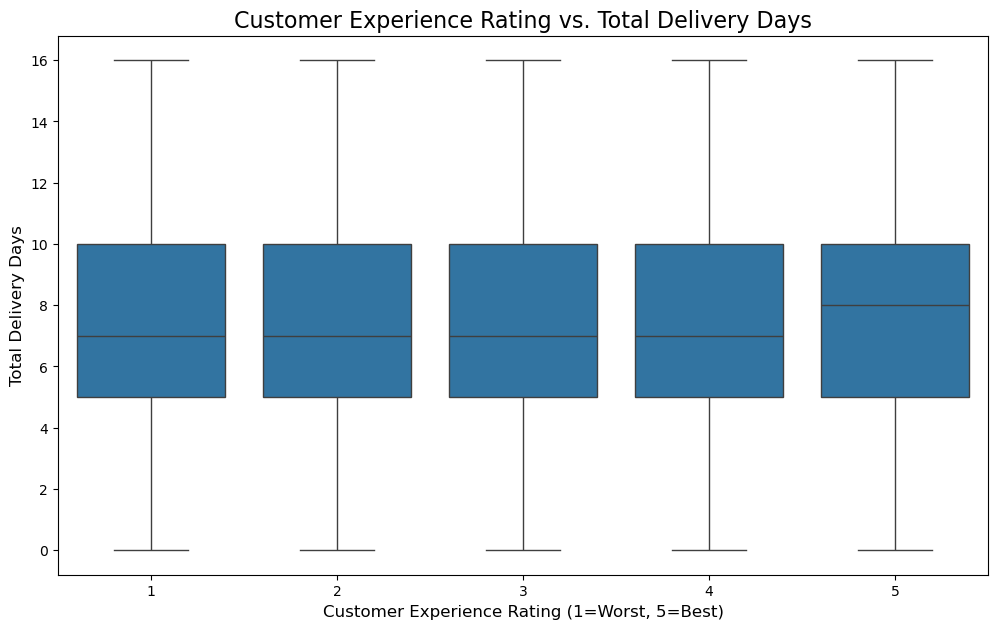

In [163]:
# relationship between delivery days and customer rating
plt.figure(figsize=(12, 7))
sns.boxplot(x='customer_exp_rating', y='total_delivery_days', data=df)
plt.title('Customer Experience Rating vs. Total Delivery Days', fontsize=16)
plt.xlabel('Customer Experience Rating (1=Worst, 5=Best)', fontsize=12)
plt.ylabel('Total Delivery Days', fontsize=12)
plt.show()

#### Insights & Business Strategy:

The boxplot shows that delivery days are not strongly related to customer experience ratings. Even customers with the best ratings (5) had similar delivery days as those with lower ratings (1 or 2).

This suggests that delivery speed alone is not the main driver of customer satisfaction. Other factors (product quality, packaging, customer service, etc.) might matter more.

##### Actionable Strategy:

Multi-factor Improvement = Improve not just delivery time, but also product quality, accuracy, and post-purchase service.

Customer Feedback Analysis = Collect more qualitative feedback (reviews, complaints) to see what actually drives ratings.

Segmentation = Identify if certain groups of customers (e.g., location-wise) face more delays and target those specifically.